In [9]:
from subgrounds import Subgrounds
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.api.types import is_numeric_dtype


In [10]:
SUBGRAPH_API_URL = "http://192.168.1.64:8000/subgraphs/name/papercliplabs/0x-protocol-mainnet-full"
# SUBGRAPH_API_URL = "http://192.168.1.64:8000/subgraphs/name/papercliplabs/0x-protocol-mainnet-final"
# SUBGRAPH_API_URL = "http://localhost:8000/subgraphs/name/papercliplabs/0x-protocol-mainnet-no-op-his-test"

sg = Subgrounds()

zero_ex = sg.load_subgraph(SUBGRAPH_API_URL)

print(date.today())

TIMESTAMP_NAME = "timestamp"
ALL_ENTRIES = 100000000

2024-01-24


In [11]:
def plot_time_series_df(df, title): 
    for k in df.keys():
        if(k != TIMESTAMP_NAME) and is_numeric_dtype(df[k]):
            # cumulative = np.array(df[k])
            # subtractor = np.insert(cumulative[:-1], 0, 0)
            # delta = cumulative - subtractor
            # plt.plot(df[TIMESTAMP_NAME], delta)
            # plt.title(title + ": " + k.split("_")[-1] + " - delta")
            # plt.figure()
            # plt.show()  
            df.plot(x=TIMESTAMP_NAME, y=k, legend=False)
            plt.title(title + ": " + k.split("_")[-1] + " - cumulative")
            plt.show()

    plt.show()  

,timestamp,protocol_dailyDataSnapshots_data_id,protocol_dailyDataSnapshots_data_erc20FillVolumeUsd,protocol_dailyDataSnapshots_data_erc20FillCount,protocol_dailyDataSnapshots_data_nftFillErc20VolumeUsd,protocol_dailyDataSnapshots_data_nftFillCount,protocol_dailyDataSnapshots_data_uniqueUserCount
0,2020-09-23 06:04:53,0x0006c906,3.406900e+01,1,0.0,0,1
1,2020-09-25 17:23:16,0x0041c906,2.220926e+05,60,0.0,0,30
2,2020-09-26 00:09:07,0x0048c906,3.254300e+05,92,0.0,0,45
3,2020-09-27 01:17:30,0x0061c906,3.746610e+05,162,0.0,0,87
4,2020-09-28 00:21:37,0x0078c906,3.984750e+05,203,0.0,0,112
...,...,...,...,...,...,...,...
113,2021-01-15 00:00:24,0x00b0d306,3.444923e+08,171775,0.0,0,69242
114,2021-01-16 00:03:36,0x00c8d306,3.543988e+08,175065,0.0,0,70143
115,2021-01-17 00:03:10,0x00e0d306,3.649973e+08,179318,0.0,0,71167
116,2021-01-18 00:00:40,0x00f8d306,3.761133e+08,184558,0.0,0,72660


826


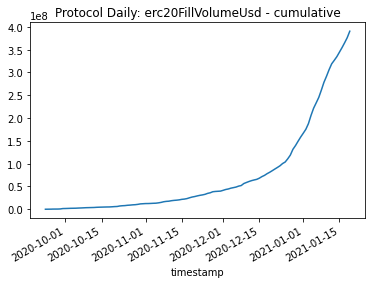

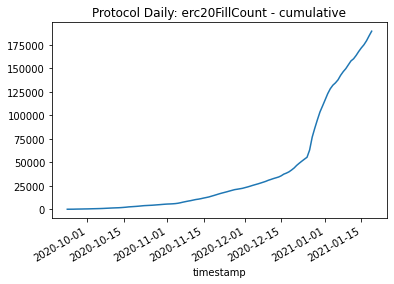

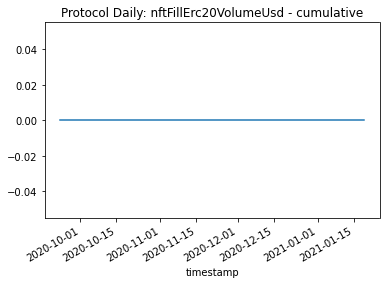

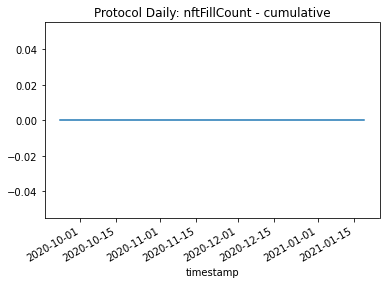

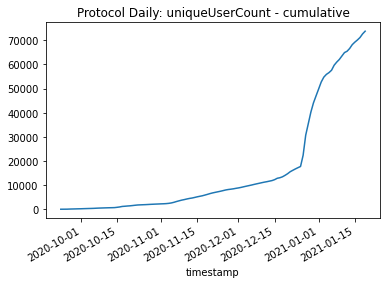

In [16]:
# Protocol Historical
protocol_daily = zero_ex.Query.protocol(id="0x00").dailyDataSnapshots(orderBy=zero_ex.DailyProtocolData.timestamp, orderDirection="asc", first=ALL_ENTRIES)

df = sg.query_df([protocol_daily.timestamp, protocol_daily.data]).iloc[:-1100]
df.rename(columns={ df.columns[0]: TIMESTAMP_NAME }, inplace = True)
df[TIMESTAMP_NAME] = pd.to_datetime(df[TIMESTAMP_NAME], unit="s")
display(df)
print(df.size)

# df.to_csv("test.csv")

plot_time_series_df(df, "Protocol Daily")

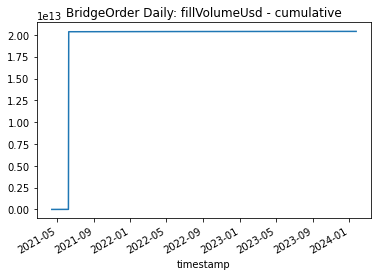

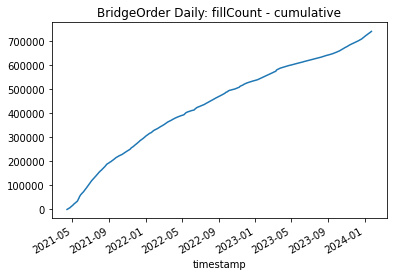

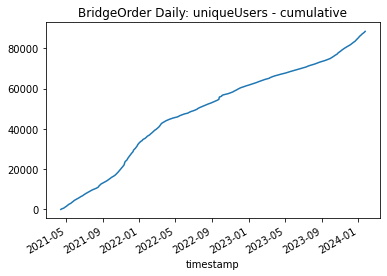

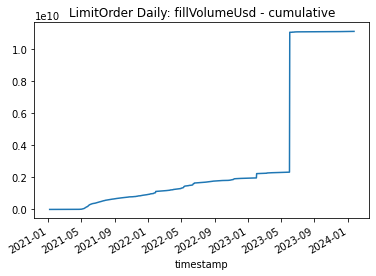

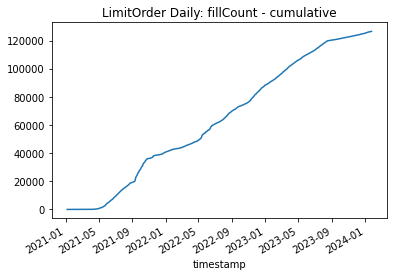

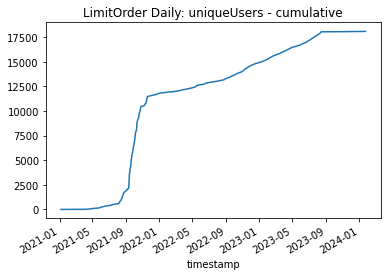

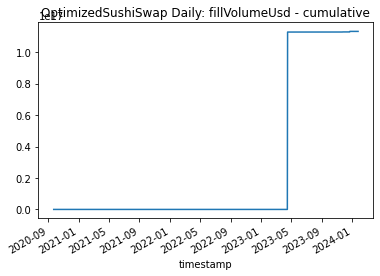

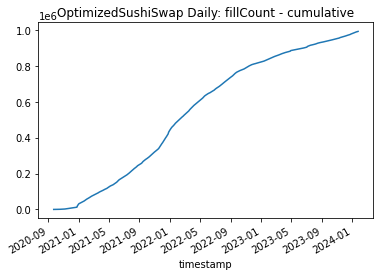

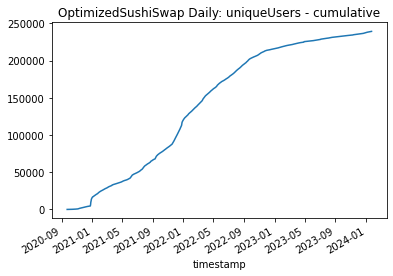

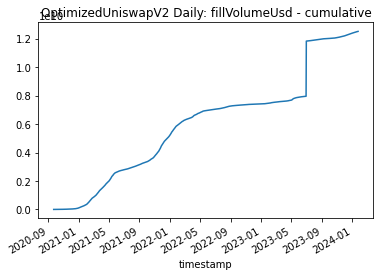

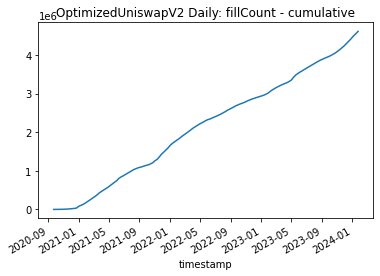

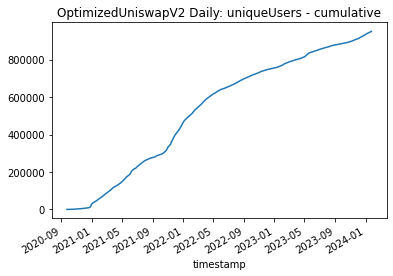

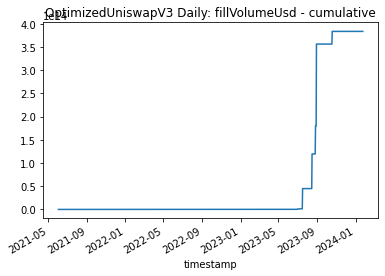

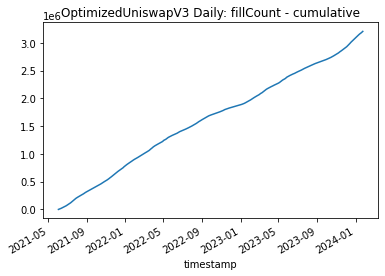

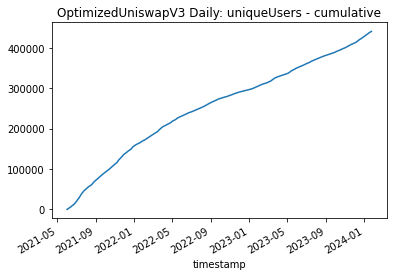

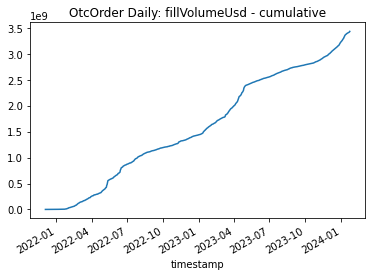

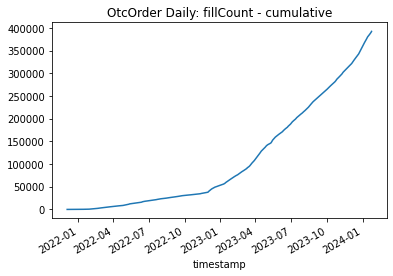

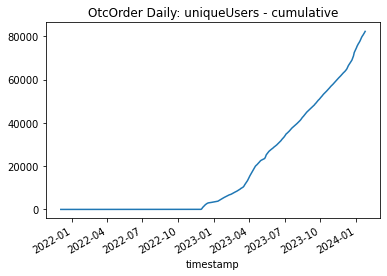

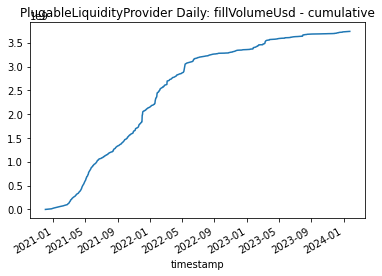

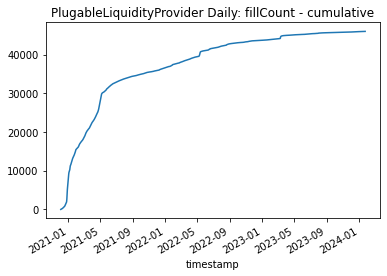

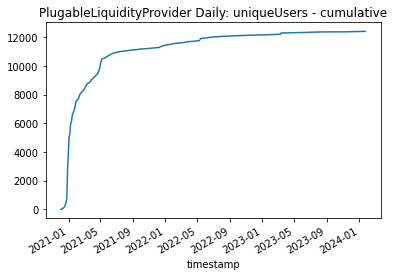

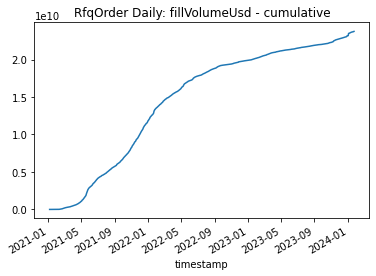

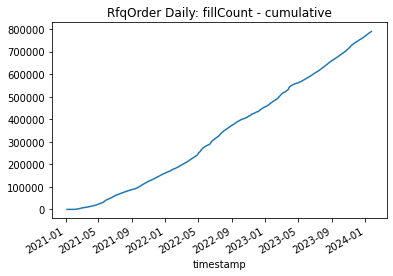

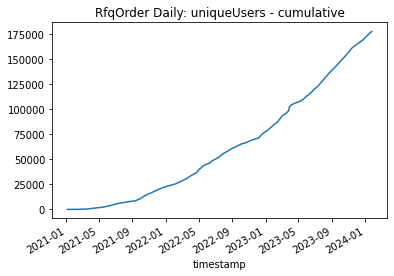

In [13]:
# Fill Type Summary Historical
fill_type_summaries = zero_ex.Query.erc20FillTypeSummaries

df = sg.query_df([fill_type_summaries.id, fill_type_summaries.type], columns=["id", "type"])

for row in df.itertuples():
    snapshots = zero_ex.Query.erc20FillTypeSummary(id=row.id).dailyDataSnapshots(first=ALL_ENTRIES, orderBy=zero_ex.DailyErc20FillTypeSummaryData.timestamp, orderDirection="asc")
    daily_snapshots_df = sg.query_df([snapshots.timestamp, snapshots.data])
    daily_snapshots_df.rename(columns={ daily_snapshots_df.columns[0]: TIMESTAMP_NAME }, inplace = True)
    daily_snapshots_df[TIMESTAMP_NAME] = pd.to_datetime(daily_snapshots_df[TIMESTAMP_NAME], unit="s")
    # display(daily_snapshots_df)
    plot_time_series_df(daily_snapshots_df, f"{row.type} Daily")


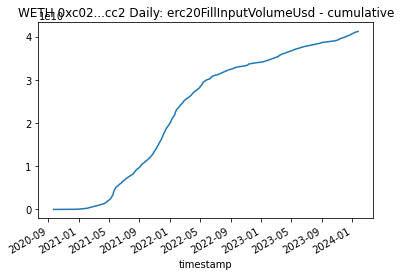

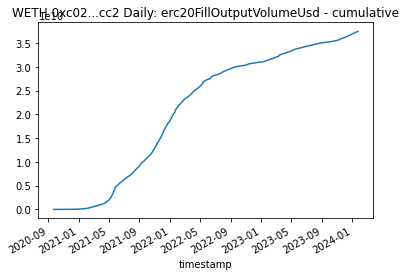

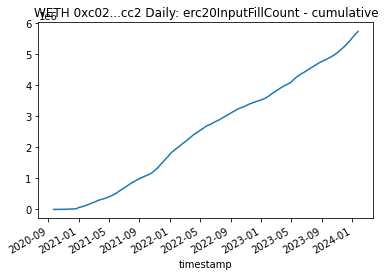

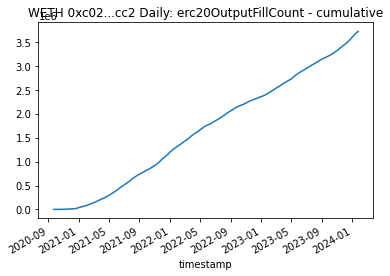

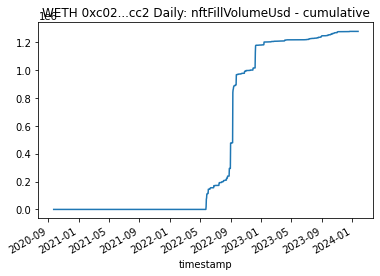

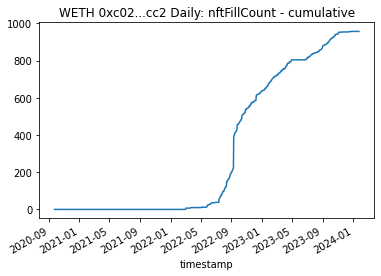

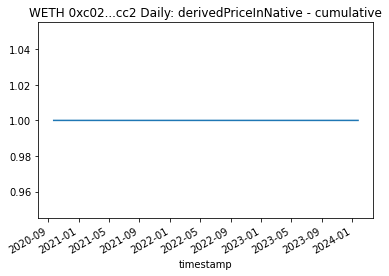

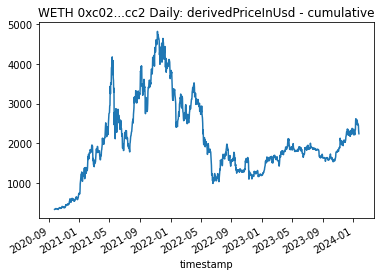

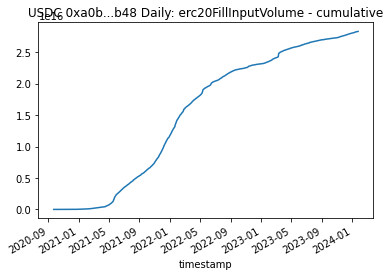

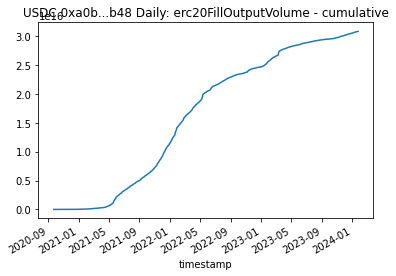

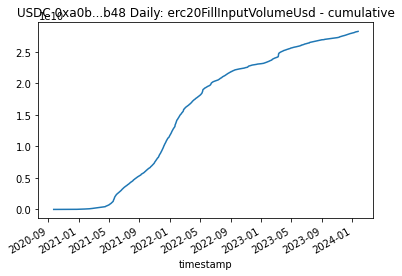

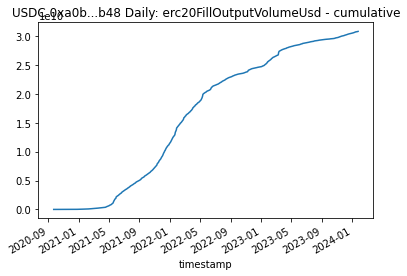

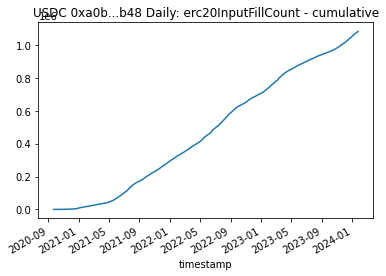

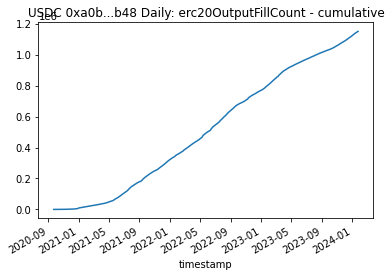

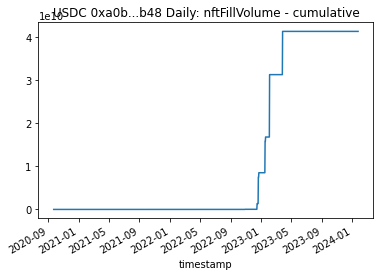

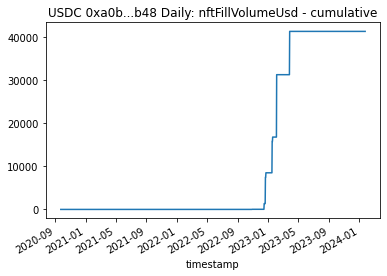

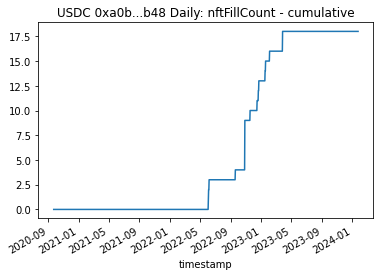

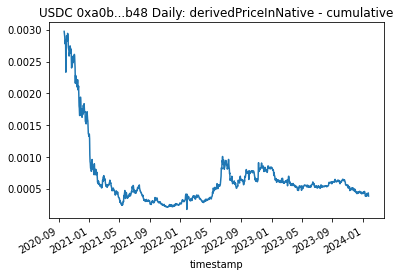

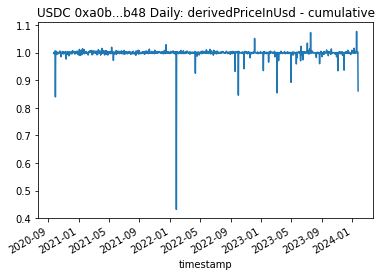

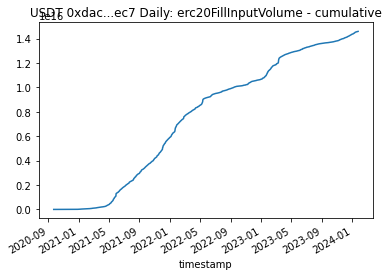

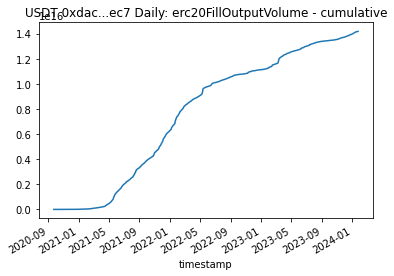

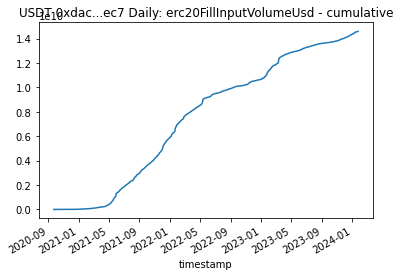

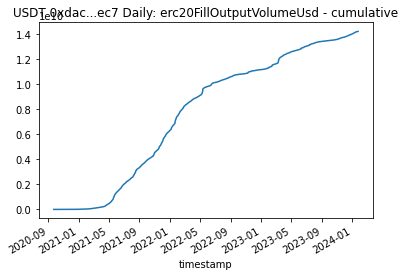

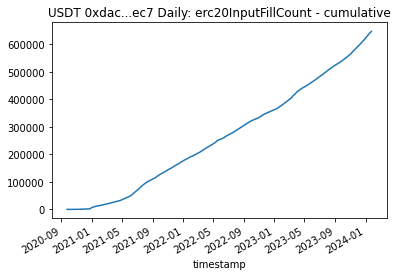

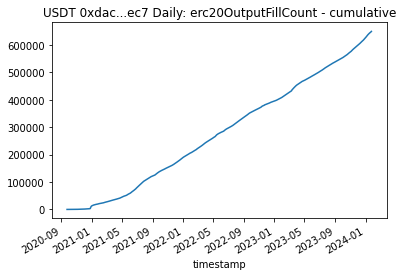

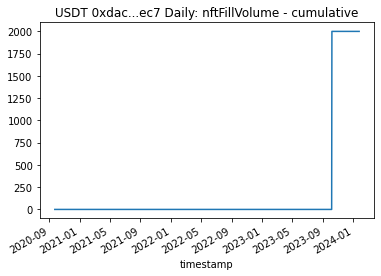

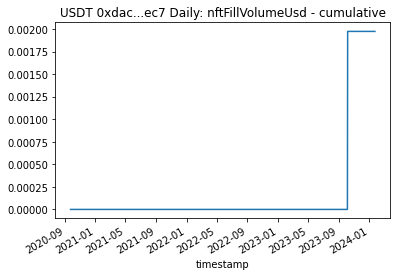

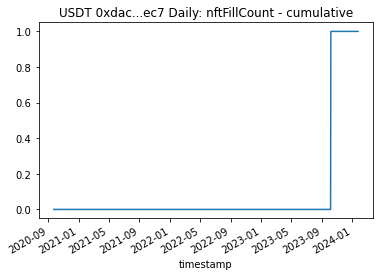

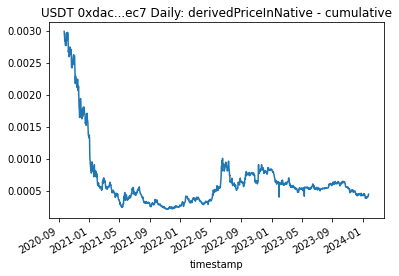

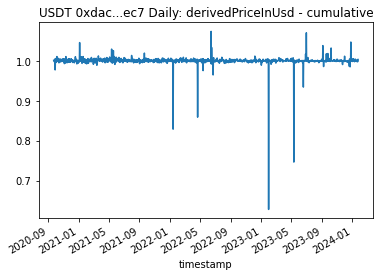

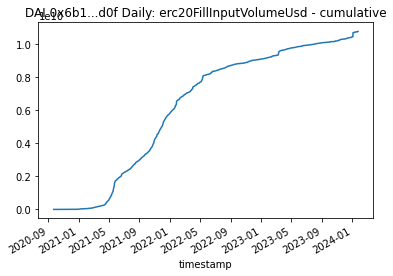

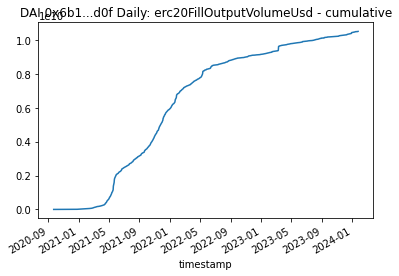

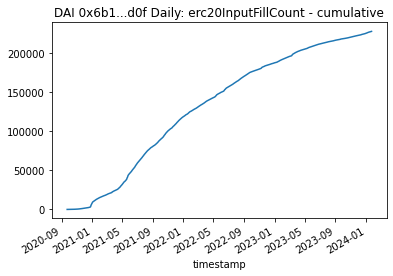

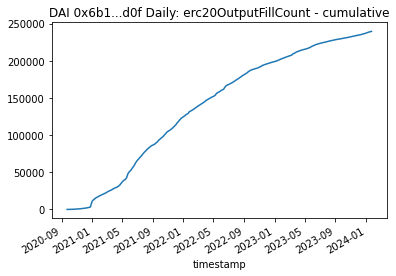

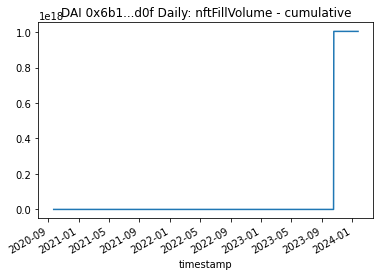

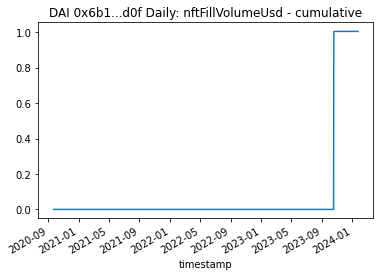

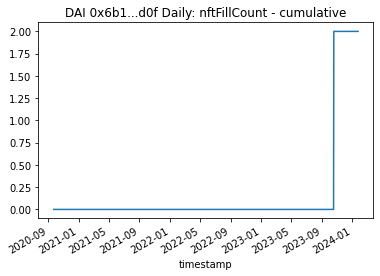

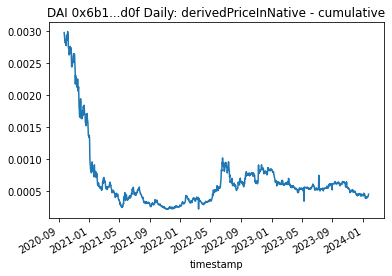

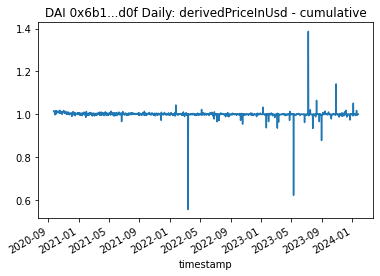

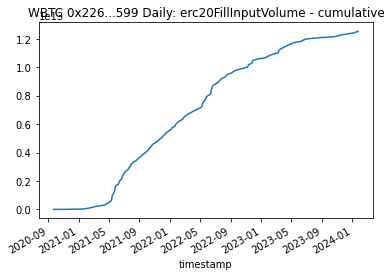

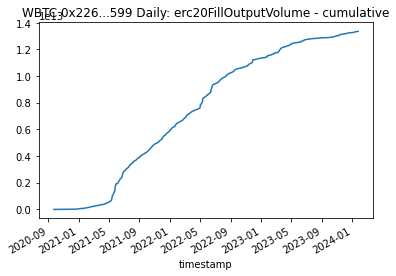

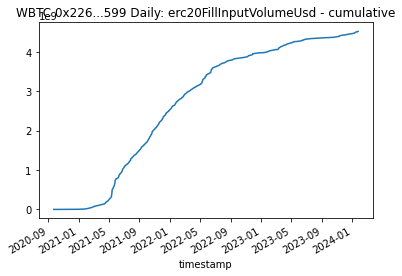

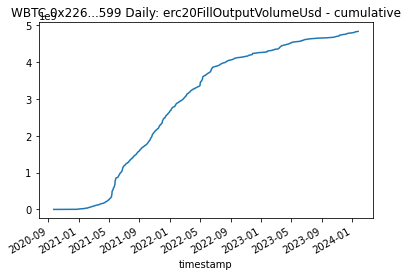

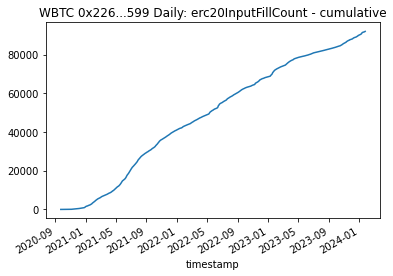

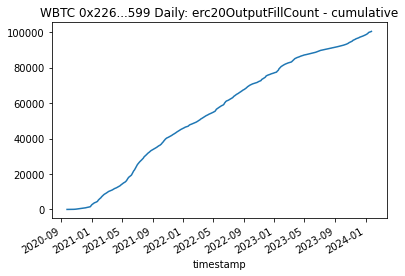

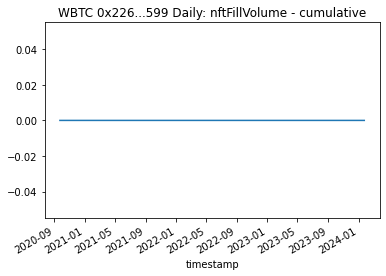

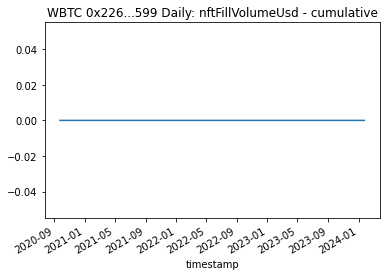

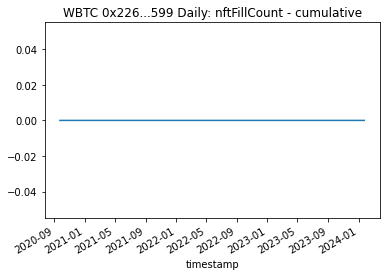

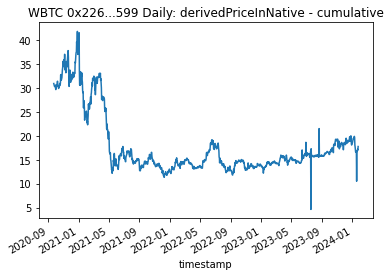

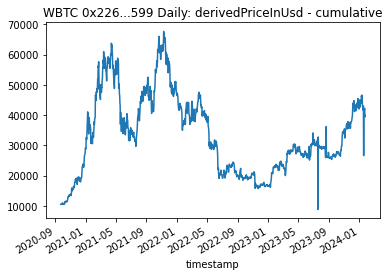

In [14]:
# ERC20 Token Historical
erc20Token = zero_ex.Query.erc20Tokens(first=5, orderBy=zero_ex.Erc20Token.data.erc20InputFillCount, orderDirection="desc")

df = sg.query_df([erc20Token.id, erc20Token.symbol, erc20Token.address], columns=["id", "symbol", "address"])

for row in df.itertuples():
    snapshots = zero_ex.Query.erc20Token(id=row.id).dailyDataSnapshots(first=ALL_ENTRIES, orderBy=zero_ex.DailyErc20TokenData.timestamp, orderDirection="asc")
    df = sg.query_df([snapshots.timestamp, snapshots.data])
    df.rename(columns={ df.columns[0]: TIMESTAMP_NAME }, inplace = True)
    df[TIMESTAMP_NAME] = pd.to_datetime(df[TIMESTAMP_NAME], unit="s")
    # display(df)
    plot_time_series_df(df, f"{row.symbol} {row.address[0:5]}...{row.address[-3:]} Daily")

In [15]:
# ERC20 Token Pair Historical
pairs = zero_ex.Query.erc20TokenPairs(first=5, orderBy=zero_ex.Erc20TokenPair.data.fillCountAtoB, orderDirection="desc")

df = sg.query_df([pairs.id, pairs.tokenA.symbol, pairs.tokenB.symbol], columns=["id", "tokenA", "tokenB"])

for row in df.itertuples():
    snapshots = zero_ex.Query.erc20TokenPair(id=row.id).dailyDataSnapshots(first=ALL_ENTRIES, orderBy=zero_ex.DailyErc20TokenPairData.timestamp, orderDirection="asc")
    df = sg.query_df([snapshots.timestamp, snapshots.data])
    df.rename(columns={ df.columns[0]: TIMESTAMP_NAME }, inplace = True)
    df[TIMESTAMP_NAME] = pd.to_datetime(df[TIMESTAMP_NAME], unit="s")
    # display(df)
    plot_time_series_df(df, f"Pair: {row.tokenA} - {row.tokenB} Daily")

/Users/spencerperkins/Developer/Environments/default/lib/python3.10/site-packages/executing/executing.py:545: ResourceWarning: unclosed <socket.socket fd=74, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.1.66', 64314), raddr=('192.168.1.64', 8000)>
  return compile(


ReadTimeout: timed out

0xd07dc4262bcdbf85190c01c996b4c06a461d2430


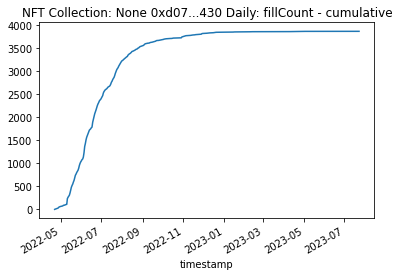

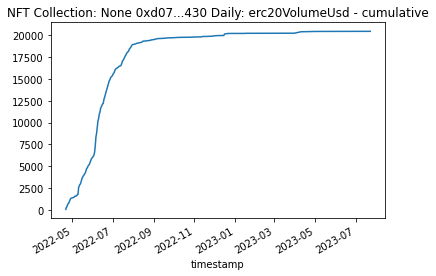

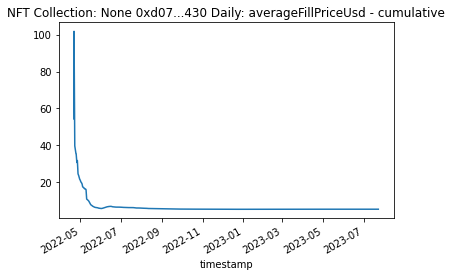

0x495f947276749ce646f68ac8c248420045cb7b5e


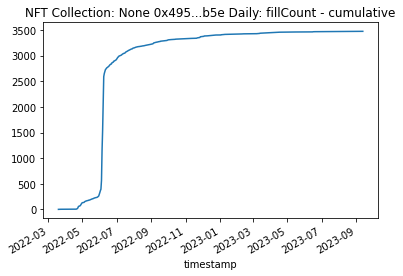

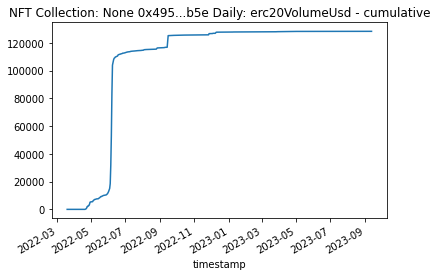

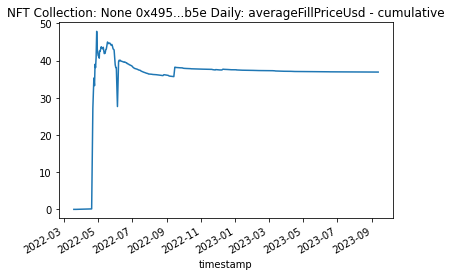

0xb66a603f4cfe17e3d27b87a8bfcad319856518b8


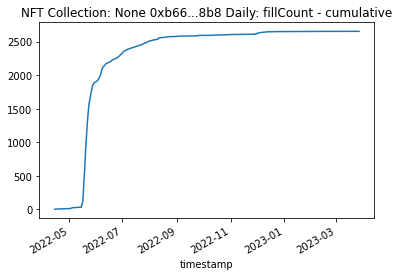

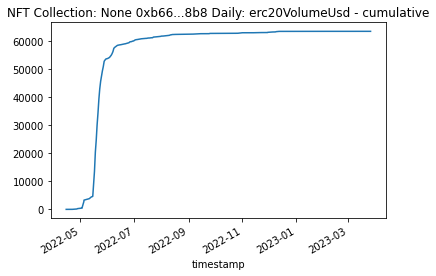

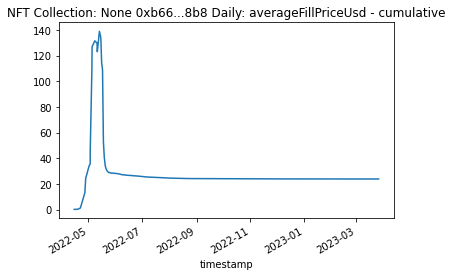

0xa909871f46d2cd8fb015d176483ffc3c330dcda4


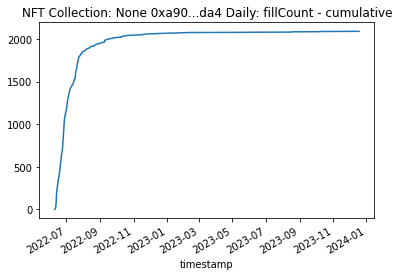

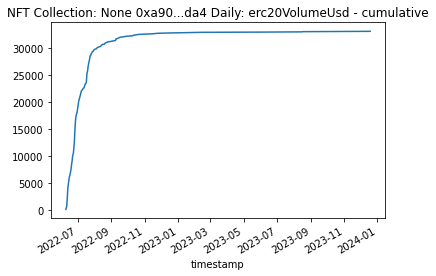

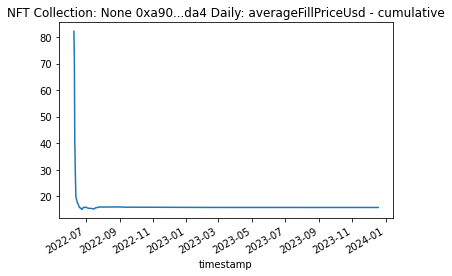

0x3fc09fa16986483edcbad8d6cf5c87e84ad5a4ce


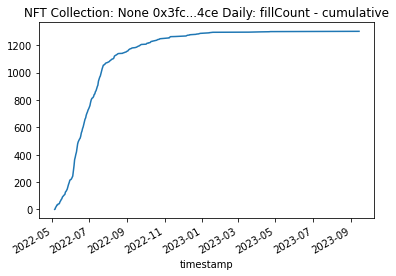

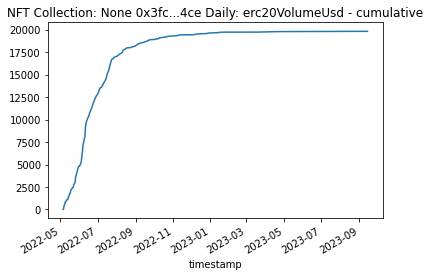

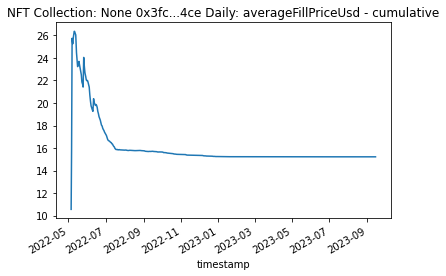

In [ ]:
# Nft Collection Historical
collections = zero_ex.Query.nftCollections(first=5, orderBy=zero_ex.NftCollection.data.fillCount, orderDirection="desc")

df = sg.query_df([collections.id, collections.address, collections.name], columns=["id", "address", "name"])
 
for row in df.itertuples():
    snapshots = zero_ex.Query.nftCollection(id=row.id).dailyDataSnapshots(first=ALL_ENTRIES, orderBy=zero_ex.DailyNftCollectionData.timestamp, orderDirection="asc")
    df = sg.query_df([snapshots.timestamp, snapshots.data])
    df.rename(columns={ df.columns[0]: TIMESTAMP_NAME }, inplace = True)
    df[TIMESTAMP_NAME] = pd.to_datetime(df[TIMESTAMP_NAME], unit="s")
    # display(df)
    print(row.address)
    plot_time_series_df(df, f"NFT Collection: {row.name} {row.address[0:5]}...{row.address[-3:]} Daily")

,erc20Token_dailyDataSnapshots_timestamp,erc20Token_dailyDataSnapshots_data_id,erc20Token_dailyDataSnapshots_data_token_id,erc20Token_dailyDataSnapshots_data_erc20FillInputVolume,erc20Token_dailyDataSnapshots_data_erc20FillOutputVolume,erc20Token_dailyDataSnapshots_data_erc20FillInputVolumeUsd,erc20Token_dailyDataSnapshots_data_erc20FillOutputVolumeUsd,erc20Token_dailyDataSnapshots_data_erc20InputFillCount,erc20Token_dailyDataSnapshots_data_erc20OutputFillCount,erc20Token_dailyDataSnapshots_data_nftFillVolume,erc20Token_dailyDataSnapshots_data_nftFillVolumeUsd,erc20Token_dailyDataSnapshots_data_nftFillCount,erc20Token_dailyDataSnapshots_data_derivedPriceInNative,erc20Token_dailyDataSnapshots_data_derivedPriceInUsd
0,1684007927,0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055432307,0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055,0,22130246289874965179001,0.000000e+00,0.000000,0,1,0,0.0,0,0.000000e+00,0.000000e+00
1,1684026383,0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055492307,0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055,0,27130810837871542128022,0.000000e+00,160.636786,0,3,0,0.0,0,1.737972e-05,3.125048e-02
2,1684145927,0xc3e8abfa04b0ec442c2a4d65699a40f7fced80556a2307,0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055,17047851544182754566751,29533924758324289831722,4.960757e+02,205.510773,2,4,0,0.0,0,1.021170e-05,1.867327e-02
3,1685216543,0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055932407,0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055,17047851544182754566751,45440725767889481527076,4.960757e+02,502.498470,2,5,0,0.0,0,1.023233e-05,1.867049e-02
4,1689409535,0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055202907,0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055,17047851544182754566751,45440725767896086733234,4.960757e+02,601.837740,2,6,0,0.0,0,7.742882e+06,1.503954e+10
5,1689540983,0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055442907,0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055,19964088403158679202359,45440725767896086733234,4.360820e+13,601.837740,3,6,0,0.0,0,7.751379e+06,1.495359e+10
6,1692138455,0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055162c07,0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055,24964088403158679202359,45440725767896086733234,1.182359e+14,601.837740,4,6,0,0.0,0,8.167686e+06,1.492555e+10
7,1693086179,0xc3e8abfa04b0ec442c2a4d65699a40f7fced80551d2d07,0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055,29015835203158679202359,45440725767896086733234,1.787507e+14,601.837740,5,6,0,0.0,0,9.069395e+06,1.493548e+10
8,1693309247,0xc3e8abfa04b0ec442c2a4d65699a40f7fced80555b2d07,0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055,40820479163485444680016,45440725767896086733234,3.550151e+14,601.837740,6,6,0,0.0,0,9.095083e+06,1.493179e+10
9,1697605247,0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055053207,0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055,42638548040073482176971,45440725767896086733234,3.823397e+14,601.837740,7,6,0,0.0,0,9.511094e+06,1.502943e+10


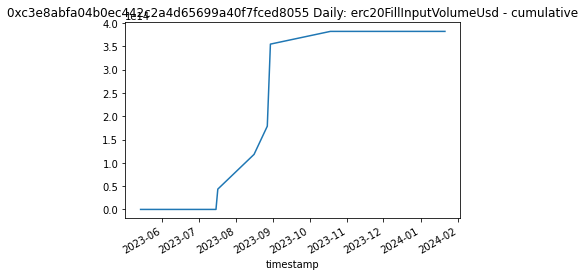

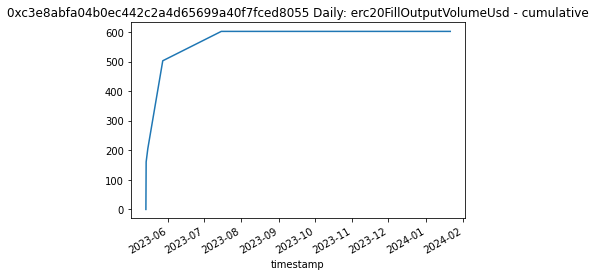

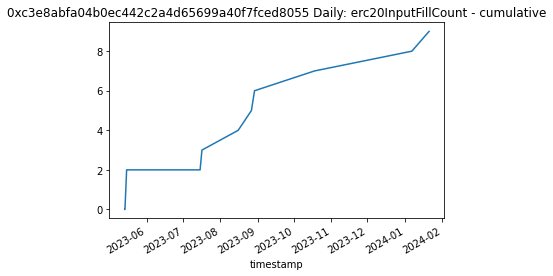

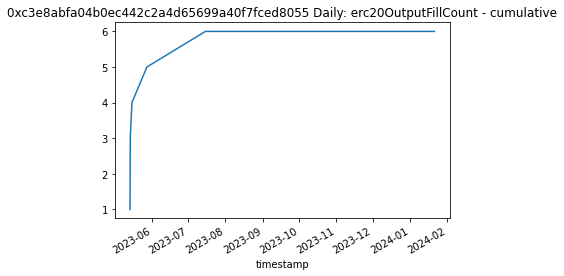

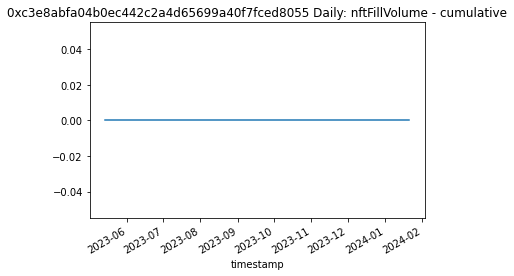

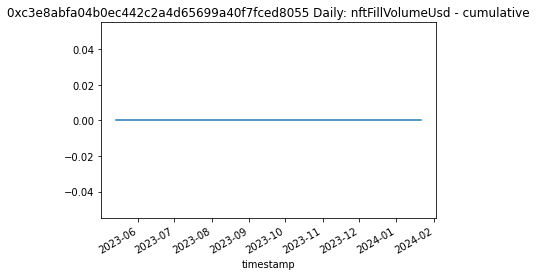

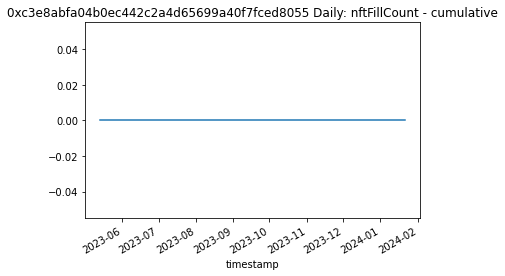

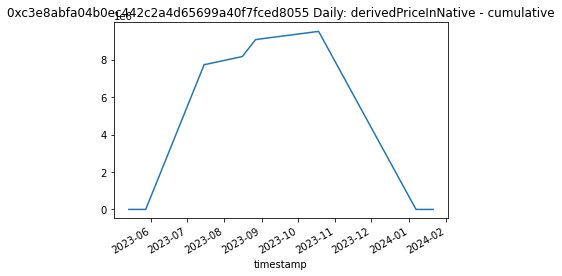

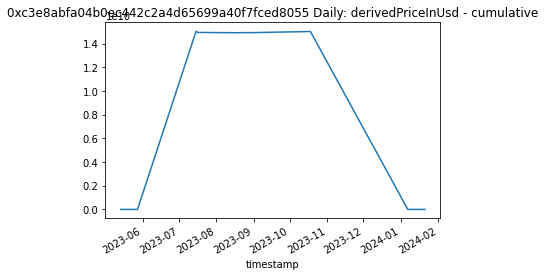

In [ ]:
# ERC20 Token Issue Investigation 
# ids = ["0xe7bcd48ea47301df7822fd8b0138e84619eaf517", "0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055", "0xb8c77482e45f1f44de1745f52c74426c631bdd52", "0xde0903dba86fe7a6c2f40c337cfaf5756784b9e1", "0xc217998dba399bd1dfa354dce6a4e278b4ade2de"]
ids = ["0xc3e8abfa04b0ec442c2a4d65699a40f7fced8055"]

for id in ids:
    snapshots = zero_ex.Query.erc20Token(id=id).dailyDataSnapshots(first=ALL_ENTRIES, orderBy=zero_ex.DailyErc20TokenData.timestamp, orderDirection="asc")
    df = sg.query_df([snapshots.timestamp, snapshots.data])
    display(df)
    df.rename(columns={ df.columns[0]: TIMESTAMP_NAME }, inplace = True)
    df[TIMESTAMP_NAME] = pd.to_datetime(df[TIMESTAMP_NAME], unit="s")
    # display(df)
    plot_time_series_df(df, f"{id} Daily")